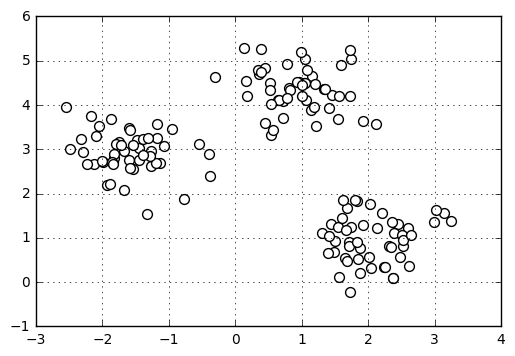

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c='white',marker='o',s=50)
plt.grid()
plt.show()

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,  #クラスタの個数
            init='random', #セントロイドの初期値をランダムに選択
            n_init=10,     #異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数
            max_iter=300,  # k-meansアルゴリズム内部の最大イテレーション回数
            tol=1e-04,     #収束と判定するための相対的な許容誤差
            random_state=0)#セントロイドの初期化に用いる乱数生成器の状態
y_km = km.fit_predict(X)   #クラスタ中心の計算と各サンプルのインデックスの予測

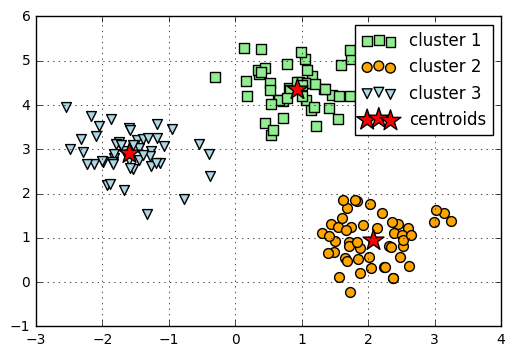

In [11]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

In [12]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


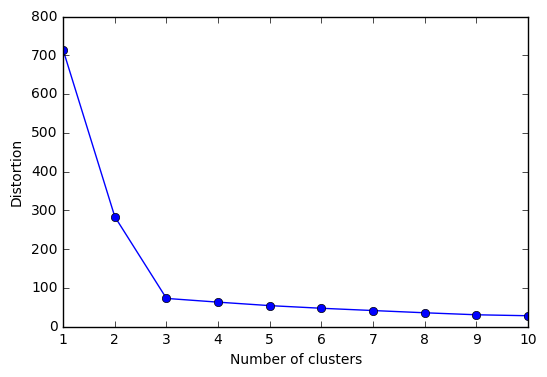

In [16]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

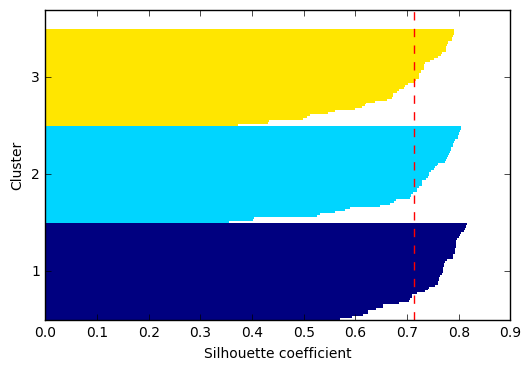

In [17]:
km = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters) # 色の値をセット
    plt.barh(range(y_ax_lower,y_ax_upper), # 水平の棒グラフを描画（底辺の範囲を指定）
             c_silhouette_vals, # 棒の幅
             height=1.0, # 棒の高さ
             edgecolor='none', # 棒の端の色
             color=color) # 棒の色
    yticks.append((y_ax_lower + y_ax_upper)/2)# クラスタラベルの表示位置の追加
    y_ax_lower += len(c_silhouette_vals) # 底辺の値に棒の幅を追加
silhouette_avg = np.mean(silhouette_vals) # シルエット係数の平均値
plt.axvline(silhouette_avg, color='red', linestyle="--") # 係数の平均値に破線を引く
plt.yticks(yticks,cluster_labels+1) # クラスタラベルを表示
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

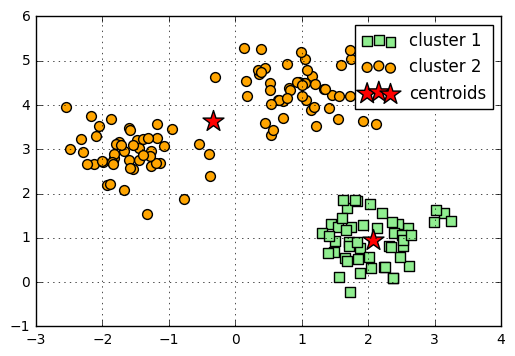

In [18]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.show()

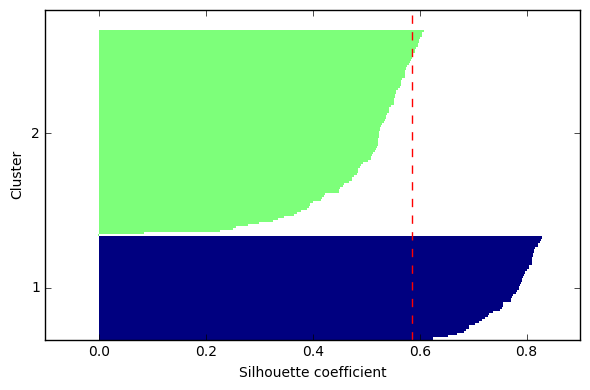

In [19]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette_bad.png', dpi=300)
plt.show()

In [20]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10 # 5行3列のサンプルデータを生成
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [21]:
from scipy.spatial.distance import pdist, squareform
# pdistで距離を計算、squareformで対称行列を作成
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [22]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering on the condensed
    distance matrix y.
    
    y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    An :math:`(n-1)` by 4  matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
    observations in the newly formed cluster.
    
    The following linkage methods are used to compute the distance
  

In [24]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [25]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], 
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


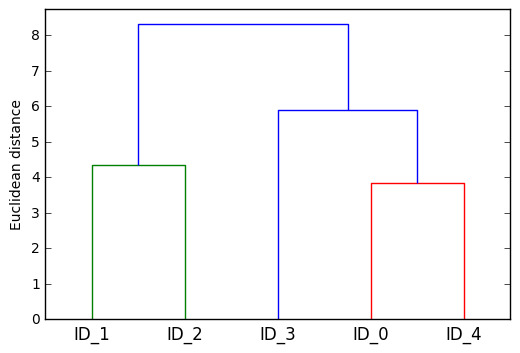

In [26]:
from scipy.cluster.hierarchy import dendrogram
# 樹形図を黒で表示する場合（パート1/2）
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, labels=labels,
                       # 樹形図を黒で表示する場合(パート2/2)
                       # color_threshold=np.inf
                      )
plt.ylabel('Euclidean distance')
plt.show()

1. 新しいfigureオブジェクトを作成し、add_axes属性を使って樹形図のx軸の位置、y軸の位置、幅、高さを定義する。さらに、樹形図を反時計回りに90度回転させる

In [31]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6]) # x軸の位置、y軸の位置、幅、高さ
# 注意：matplotlibがv1.5.1以下の場合は、orientation='left'を使用すること
row_dendr = dendrogram(row_clusters, orientation='left')

2.次に、クラスタリングのラベルに従って最初のDataFrameオブジェクトのデータを並び替える。クラスタリングのラベルには、樹形図オブジェクト(dendr)からアクセスできる。樹形図オブジェクトは、基本的にはPythonのディクショナリである。クラスタリングのラベルにアクセスするには、キーとしてleavesを使用する。

In [32]:
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

In [33]:
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

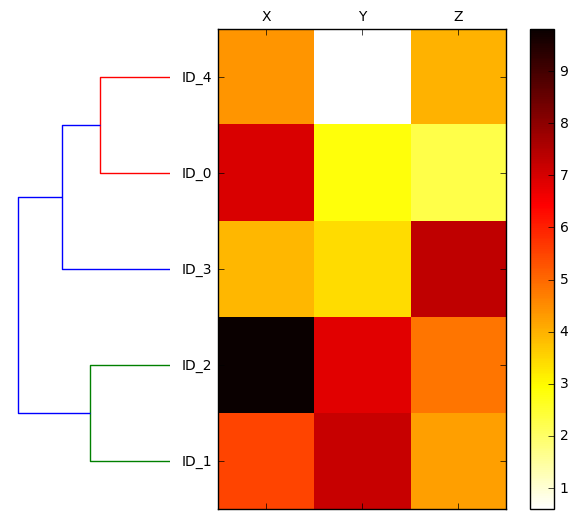

In [34]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, # クラスタの個数 
                             affinity='euclidean', # 類似度の指標（ここではユークリッド距離）
                             linkage='complete') # 連結方法(ここでは完全連結法)
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


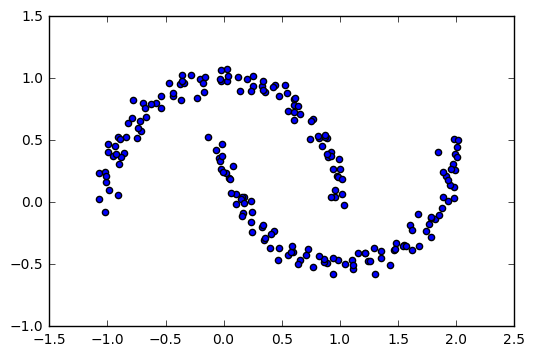

In [36]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

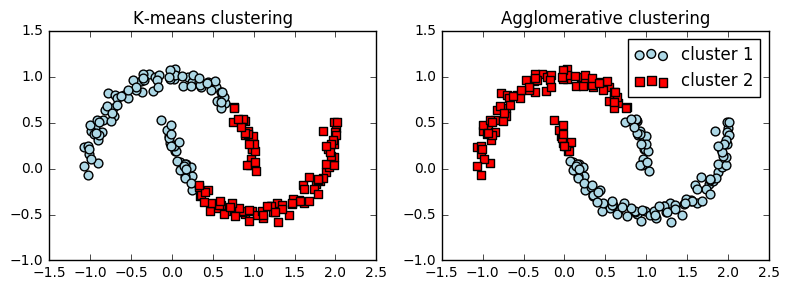

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

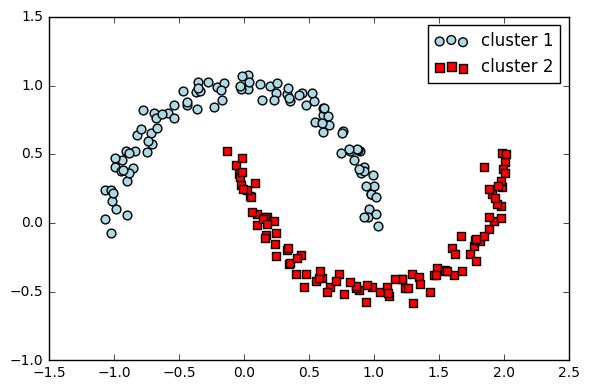

In [38]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/moons_dbscan.png', dpi=300)
plt.show()
